In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

file_path = '/content/drive/MyDrive/HeartDisease/Heart_Disease_Prediction.csv'
df = pd.read_csv(file_path)
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [6]:
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [8]:
print(X_train.shape)
print(X_test.shape)

(216, 13)
(54, 13)


### **Random Forest Classifier**

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)


In [11]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
y_pred = rf_model.predict(X_test)


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [17]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Presence')
recall = recall_score(y_test, y_pred, pos_label='Presence')
f1 = f1_score(y_test, y_pred, pos_label='Presence')


In [18]:
print(f"Accuracy  : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall    : {recall:.2f}")
print(f"F1 Score  : {f1:.2f}")


Accuracy  : 0.81
Precision : 0.77
Recall    : 0.83
F1 Score  : 0.80


In [15]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))



Classification Report:

              precision    recall  f1-score   support

     Absence       0.86      0.80      0.83        30
    Presence       0.77      0.83      0.80        24

    accuracy                           0.81        54
   macro avg       0.81      0.82      0.81        54
weighted avg       0.82      0.81      0.82        54



## **Decision Tree**

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dt_model = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

In [22]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [23]:
y_pred_dt = dt_model.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, pos_label='Presence')
recall_dt = recall_score(y_test, y_pred_dt, pos_label='Presence')
f1_dt = f1_score(y_test, y_pred_dt, pos_label='Presence')

print(f"Decision Tree Accuracy  : {accuracy_dt:.2f}")
print(f"Decision Tree Precision : {precision_dt:.2f}")
print(f"Decision Tree Recall    : {recall_dt:.2f}")
print(f"Decision Tree F1 Score  : {f1_dt:.2f}")

Decision Tree Accuracy  : 0.80
Decision Tree Precision : 0.74
Decision Tree Recall    : 0.83
Decision Tree F1 Score  : 0.78


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Absence       0.86      0.80      0.83        30
    Presence       0.77      0.83      0.80        24

    accuracy                           0.81        54
   macro avg       0.81      0.82      0.81        54
weighted avg       0.82      0.81      0.82        54



### **Logistic Regression**

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr_model = LogisticRegression(
    max_iter=1000,
    solver='liblinear',
    random_state=42
)

In [28]:
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [29]:
y_pred_lr = lr_model.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, pos_label='Presence')
recall_lr = recall_score(y_test, y_pred_lr, pos_label='Presence')
f1_lr = f1_score(y_test, y_pred_lr, pos_label='Presence')

print(f"Logistic Regression Accuracy  : {accuracy_lr:.2f}")
print(f"Logistic Regression Precision : {precision_lr:.2f}")
print(f"Logistic Regression Recall    : {recall_lr:.2f}")
print(f"Logistic Regression F1 Score  : {f1_lr:.2f}")


Logistic Regression Accuracy  : 0.85
Logistic Regression Precision : 0.81
Logistic Regression Recall    : 0.88
Logistic Regression F1 Score  : 0.84


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Absence       0.86      0.80      0.83        30
    Presence       0.77      0.83      0.80        24

    accuracy                           0.81        54
   macro avg       0.81      0.82      0.81        54
weighted avg       0.82      0.81      0.82        54



In [34]:
import pandas as pd

results = pd.DataFrame({
    'Actual': y_test,
    'Logistic Regression': y_pred_lr,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred
})

results.head(10)

,Actual,Logistic Regression,Decision Tree,Random Forest
195,Absence,Absence,Absence,Absence
132,Absence,Absence,Absence,Absence
162,Absence,Absence,Absence,Absence
129,Presence,Presence,Presence,Presence
66,Absence,Absence,Absence,Absence
254,Absence,Absence,Absence,Absence
38,Absence,Absence,Absence,Absence
65,Presence,Presence,Presence,Presence
97,Presence,Presence,Presence,Presence
61,Presence,Presence,Presence,Presence


### **Confusion Matrix**

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [36]:
cm = confusion_matrix(
    y_test,
    y_pred_lr,
    labels=['Absence', 'Presence']
)

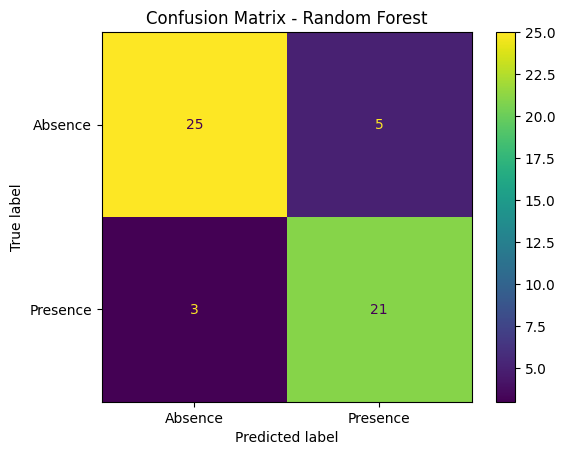

In [37]:
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Absence', 'Presence']
)

disp.plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()